<a href="https://colab.research.google.com/github/danpamplona/TareasMineria/blob/main/Ejemplo5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtración binaria óptima 
##Daniel E. Quintero Pamplona
# Principios en teoría de detección y reconocimiento de patrones (clasificación)

- Se presenta un ejemplo ilustrativo de detección de nive DC desde un problema de test de hipotésis.

- Además, se ilustra el concepto de simulaciones de Monte Carlo, como alternativa a la estimación de la distribución del estimador.


- Hipótesis nula: señal (datos) recibida es ruido.

$$H_o: x[n] = w[n]$$

- Hipótesis no nula: señal (datos) recibida es nivel DC más ruido.

$$H_1: x[n] = A + w[n]$$

**Nota**: en este caso se asume ruido blanco Gaussiano $w\sim \mathcal{N}(w|0,\sigma^2).$


- Para la simulación de Monte-Carlo con M repeticiones se utilizará un estimador de media simple: 

 $$\hat{A}[m] = \frac{1}{N}\sum^N_{n=1} x[n]$$
 donde $\hat{A}_m$ corresponde a la $m$-ésima estimación sobre las $M$ iteraciones.

 - A partir del areglo de $M$ simulaciones de Monte Carlo, se puede utilizar un conteo simple (frecuencia relativa) para calcular la probabilidad de masa del estimador.

- Se compara la influencia en el estimador para $N =\{1,20\}$

- Se fijan $M = 100$ repeticiones del experimento de Monte Carlo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 1 # nivel DC
N1 = 1 # muestras a considerar en la detección N=1
N2 = 20 # N=20
M = 100 # simulaciones monte carlo
varw = 0.5 #varianza del ruido
T1sr = np.zeros(M)
T2sr = np.zeros(M)
T1r = np.zeros(M)
T2r = np.zeros(M)

for m in range(M):#iteraciones de Monte Carlo
  w1 = np.sqrt(varw)*np.random.randn(N1) # ruido simulado para N = 1
  w2 = np.sqrt(varw)*np.random.randn(N2) # ruido simulado para N = 20
  x1 = A + w1 #señal recibida
  x2 = A + w2
  #detector sobre señal mas ruido
  T1sr[m] = x1.mean()
  T2sr[m] = x2.mean()
  #detector sobre solo ruido
  T1r[m] = w1.mean()
  T2r[m] = w2.mean()

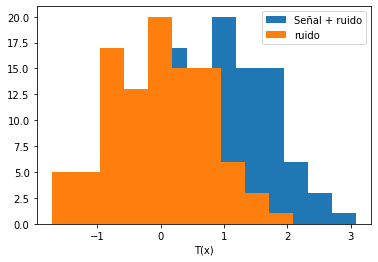

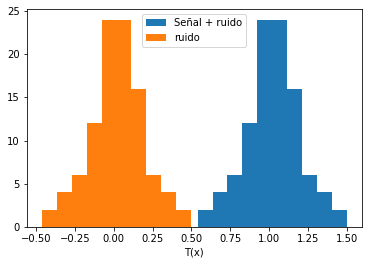

In [ ]:
import matplotlib.pyplot as plt
#graficar las probabilidades del estimador
plt.hist(T1sr,label='Señal + ruido')
plt.hist(T1r,label='ruido')
plt.xlabel('T(x)')
plt.legend()
plt.show()

plt.hist(T2sr,label='Señal + ruido')
plt.hist(T2r,label='ruido')
plt.xlabel('T(x)')
plt.legend()
plt.show()

# Ejercicio:

1. Cálcule el coeficiente de desvio para los resultados obtenidos. Ver [https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_Clasificacion/1_TeoriaDeteccion.pdf](https://github.com/amalvarezme/AnaliticaDatos/blob/master/3_Clasificacion/1_TeoriaDeteccion.pdf).
Programar el valor de d
2. Compare la capacidad de detección del estimador $\tilde{A}=x[0]$ respecto al de media muestral $\hat{A} = \frac{1}{N}\sum^N_{n=1} x[n]$.

In [ ]:
#Desvío 1
d1=(np.mean(T1sr)-np.mean(T1r))**2/np.var(T1r)
print(d1)

1.6956956348607013


In [ ]:
#Desvío 2
d2=(np.mean(T2sr)-np.mean(T2r))**2/np.var(T2r)
print(d2)

32.525537095646


In [ ]:
#Para N1=1
d=(N1*A)/varw
print(d)
#Para N2=20
d=(N2*A)/varw
print(d)

2.0
40.0


In [ ]:
print(T1r[0] , T2r[0])

0.017908835906794214 -0.12516832255943638


In [ ]:
print(np.mean(T1r[1:]),np.mean(T2r[1:]))

-0.00826511742915793 0.023293542956547827


Estimador 1: sesgo=0, Estimador 2:



*   De los coeficientes de descío se puede decir que a mayor número de muestras este coeficiente crece, lo cual implica que es más fácil realizar una separación entre la señal y el ruido. 


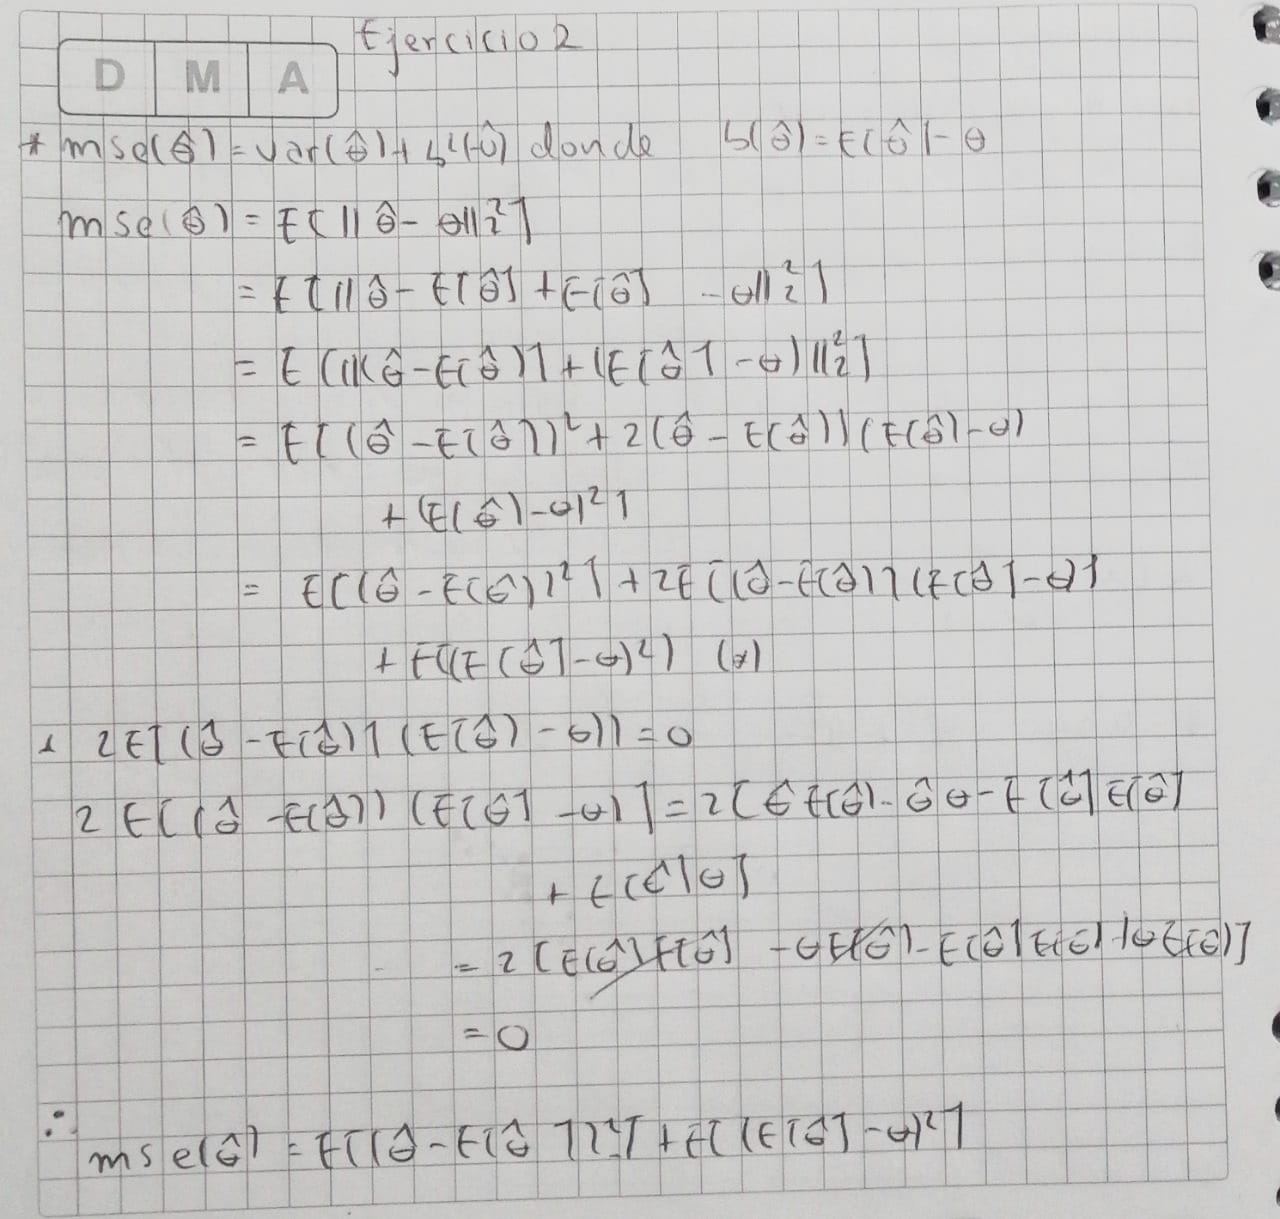

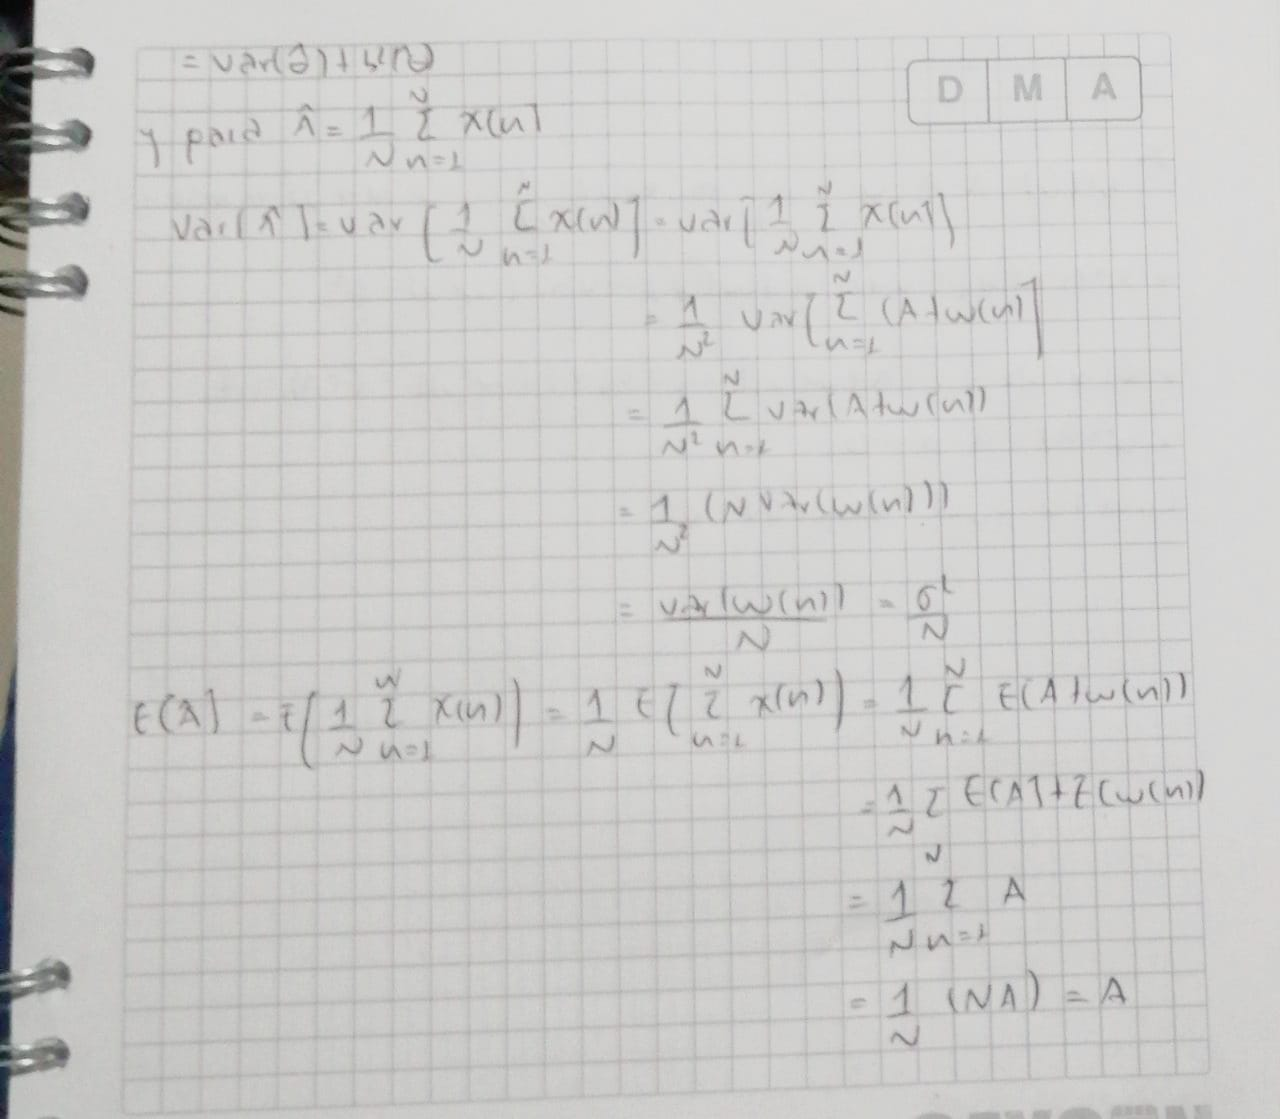

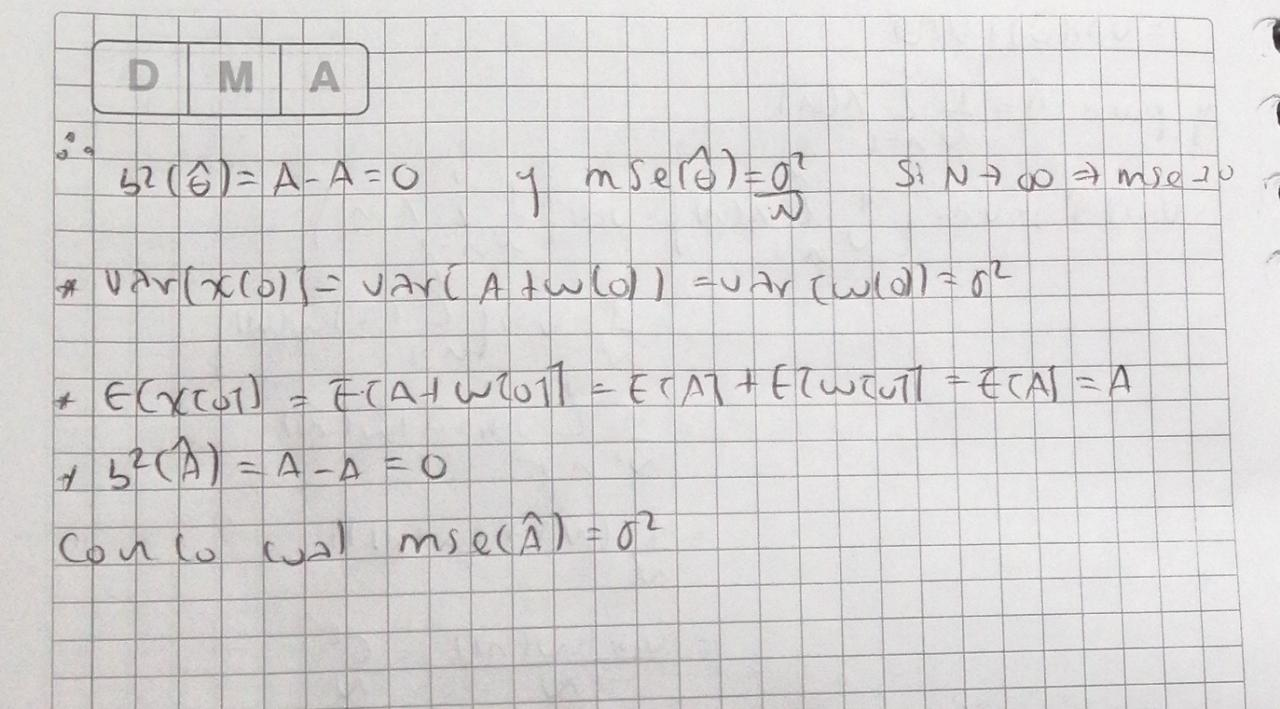